<a href="https://colab.research.google.com/github/Rudy-Nzau/Coursera_Capstone/blob/master/City_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python Data Analyses and Visualization**

##**1) Introduction**

European cities data

Cities are interesting. Some people enjoy living in cities, others tend to avoid them and rather prefer the countryside. Whatever is your preference, one thing is true: Cities generate a huge amount of data that are good source for analyses.

The following is a brief tutorial to get quick insight into Python data analyses and visualization. It is meant to be an introduction for beginners1. Much of this is already documented on the web, and sometimes with more detail. So why another guide?

Many guides treat every topic separately and use new datasets everytime a new data problem is presented. There are however advantages of using the same dataset for learning a large variety of analyses. One advantage is time-related, in that all attention can be focused on coding without losing "switching" time understanding new datasets. More importantly, working on a single dataset one experiences the evolution from preprocessing till visualization.

The goal of this tutorial is not to solve an important data science problem. For this, anyways, the presented data is too small. The goal is to use an intuitive dataset to learn Python, intuitive in the sense that it contains data that everyone can understand without prior domain knowledge. It should therefore be suitable for someone who is a starter in Data Science.

##**2) Jupyter notebook and loading packages**

In [3]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime

The packages here below are needed for **visualizations**, such as **Matplotlib**, **Seaborn**, and **Plotly**:



In [12]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import plotly
import plotly as py
import plotly.graph_objs as go

The following packages will be used for **geographic mapping**:


In [14]:
pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 16.3 MB/s 
     |████████████████████████████████| 30.5 MB 313 kB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 


In [1]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math

##**3) Create a dataframe manually**

We are going to use data from European cities, consisting of categorical and numerical data. The data were obtained from Wikipedia. Temperatures are daily means in Celsius. Population is urban population. Altitude is the highest level reported.

We are going to create a DataFrame manually, later we will see how to load a DataFrame. After typing the following code, your DataFrame df1 is created.



In [5]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, 520, 338, 542],
        'MeasureDate':[np.nan, np.nan, '01-01-2013', '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}
df1 = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])

In [6]:
df1.head(4)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000
2,Paris,5.0,20.6,French,NaN,01-01-2013,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072


##**4) Selecting raws and columns**

In [7]:
df1['Temp_Jan'].head(3)

0     3.4
1    11.8
2     5.0
Name: Temp_Jan, dtype: float64

In [8]:
df1.Temp_Jan.head(3)

0     3.4
1    11.8
2     5.0
Name: Temp_Jan, dtype: float64

We can use .loc and .iloc notation, df1.loc or df1.iloc, for selecting rows and columns. .loc is label based, .iloc is integer position based. Let us look at these two. We first start with the .loc notation. The following selects all rows and one column:


In [8]:
df1.loc[:,['Temp_Jan']].head(3)

,Temp_Jan
0,3.4
1,11.8
2,5.0


To select a row, for example the first row, do the following. Python starts indexing from 0 (0=first row, 1=second row, etc.):

In [9]:
df1.loc[0,:]

Place          Amsterdam
Temp_Jan             3.4
Temp_Jul            17.6
Language           Dutch
Altitude            -2.0
MeasureDate          NaN
Population       1351587
Name: 0, dtype: object

In [10]:
df1.iloc[:,0]

0    Amsterdam
1    Barcelona
2        Paris
3       Geneva
4       Munich
5       Athens
6       Vienna
Name: Place, dtype: object

In [11]:
df1.iloc[0:2,:]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000


In [12]:
df1.iloc[0:2,2:3]

,Temp_Jul
0,17.6
1,25.7


In [13]:
df1.iloc[[1,0],[3,2]]

,Language,Temp_Jul
1,Catalan and Spanish,25.7
0,Dutch,17.6


##**5) Data types**

In [14]:
type(df1)

pandas.core.frame.DataFrame

In [15]:
df1.dtypes

Place           object
Temp_Jan       float64
Temp_Jul       float64
Language        object
Altitude       float64
MeasureDate     object
Population       int64
dtype: object

Convert the variable Language into a categorical variable.

In [16]:
df1['Language'] = df1['Language'].astype('category')

In [17]:
df1['Language'].dtypes

CategoricalDtype(categories=['Catalan and Spanish', 'Dutch', 'French', 'German', 'Greek'], ordered=False)

Now we change the column MeasureDate to a date variable


In [18]:
df1['MeasureDate'].dtypes

dtype('O')

In [19]:
df1['MeasureDate']=pd.to_datetime(df1['MeasureDate'])

In [20]:
df1['MeasureDate'].dtypes

dtype('<M8[ns]')

In [21]:
df1.dtypes

Place                  object
Temp_Jan              float64
Temp_Jul              float64
Language             category
Altitude              float64
MeasureDate    datetime64[ns]
Population              int64
dtype: object

##**6) Basic properties**

In [22]:
df1.columns

Index(['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude', 'MeasureDate',
       'Population'],
      dtype='object')

In [23]:
df1.values

array([['Amsterdam', 3.4, 17.6, 'Dutch', -2.0, NaT, 1351587],
       ['Barcelona', 11.8, 25.7, 'Catalan and Spanish', 12.0, NaT,
        4740000],
       ['Paris', 5.0, 20.6, 'French', nan,
        Timestamp('2013-01-01 00:00:00'), 10601122],
       ['Geneva', 1.5, 20.2, 'French', 375.0,
        Timestamp('2015-01-12 00:00:00'), 198072],
       ['Munich', 0.3, 19.4, 'German', 520.0,
        Timestamp('2015-12-31 00:00:00'), 1450381],
       ['Athens', 9.9, 28.5, 'Greek', 338.0, NaT, 3090508],
       ['Vienna', 1.2, 19.1, 'German', 542.0,
        Timestamp('2017-01-01 00:00:00'), 2600000]], dtype=object)

In [24]:
df1.columns[0]

'Place'

In [25]:
df1.shape

(7, 7)

In [26]:
len(df1)

7

##**7) Load an other dataframe**

In [27]:
url = 'https://raw.githubusercontent.com/RRighart/City/master/df2.csv'
df2 = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

In [28]:
df2.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017
1,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
2,Helsinki,-3.9,17.8,Finnish,NaN,2016-03-31,1231595


In [29]:
df2.dtypes

Place           object
Temp_Jan       float64
Temp_Jul       float64
Language        object
Altitude       float64
MeasureDate     object
Population       int64
dtype: object

In [30]:
df2['Language'] = df2['Language'].astype('category')

In [31]:
df2['MeasureDate']=pd.to_datetime(df2['MeasureDate'])

In [32]:
df2.dtypes

Place                  object
Temp_Jan              float64
Temp_Jul              float64
Language             category
Altitude              float64
MeasureDate    datetime64[ns]
Population              int64
dtype: object

For categorical variables, it is essential to know the frequency of each category. Note that a slightly different notation, namely df2['Language'].value_counts(), works here as well.

In [33]:
df2.Language.value_counts()

English       3
French        3
Swedish       2
Croatian      1
Dutch         1
Finnish       1
Italian       1
Norwegian     1
Portuguese    1
Spanish       1
Turkish       1
Name: Language, dtype: int64

##**8) Append two dataframes**

It is often the case that data are acquired from disparate sources, like we have here. So now the trick is to bind the two sets together.

In [34]:
df = df1.append(df2, ignore_index=True)

Displaying the whole DataFrame df now we can see that there are 23 rows.

In [35]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072
4,Munich,0.3,19.4,German,520.0,2015-12-31,1450381
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
6,Vienna,1.2,19.1,German,542.0,2017-01-01,2600000
7,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017
8,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
9,Helsinki,-3.9,17.8,Finnish,NaN,2016-03-31,1231595


Another way this can be done is by the pd.concat function4:

In [36]:
pd.concat([df1, df2], ignore_index=True).head(4)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072


##**9) Missing vaalues**

One of the first data inspections is if and where there are missing values (data that are not available for various reasons). As we can see, there are missing values in the data; missing values are labeled differently in Python for numeric data (NaN) and dates (NaT)5. First let's see how to detect where missing values occur.

The following command will indicate those cells with "True" where there is a missing value.

In [37]:
pd.isnull(df).head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False


The cells that mention "True" are missing values. They only occur for Altitude and MeasureDate. It is also possible to inspect specific variables, just to avoid the output of the whole datasheet.

In [38]:
pd.isnull(df['Altitude']).head(5)

0    False
1    False
2     True
3    False
4    False
Name: Altitude, dtype: bool

There is a simple way to check the number of missing values per variable, using the is.null function.

In [39]:
df.isnull().sum()

Place           0
Temp_Jan        0
Temp_Jul        0
Language        0
Altitude        6
MeasureDate    14
Population      0
dtype: int64

The inverse is also possible, that is counting the number of nonmissing values.

In [40]:
df.count()

Place          23
Temp_Jan       23
Temp_Jul       23
Language       23
Altitude       17
MeasureDate     9
Population     23
dtype: int64

Statistics could be computed while ignoring the missing values. Another possibility is to drop the row(s) that contains any missing value, using df.dropna(how='any'). If you put how='all' it will only drop the row(s) if all values are missing. Note that only writing it to df will change the DataFrame. So if df = df.dropna(how='any') were used, the DataFrame df would have changed.

In [41]:
df.dropna(how='any')

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072
4,Munich,0.3,19.4,German,520.0,2015-12-31,1450381
6,Vienna,1.2,19.1,German,542.0,2017-01-01,2600000
8,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
10,Lulea,-5.1,20.7,Swedish,6.0,2014-12-31,75966
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434


Missing values are automatically omitted from summary statistics, such as describe().

In [42]:
df['Altitude'].describe()

count     17.000000
mean     122.941176
std      191.653160
min       -2.000000
25%        1.000000
50%       23.000000
75%      140.000000
max      542.000000
Name: Altitude, dtype: float64

It is possible to replace values with NaNs that fulfill a certain condition, for example if Altitude is larger than 500 m. It is adviced to refrain from using chain indices, such as df['Altitude'][df['Altitude']>350]=np.nan6

In [43]:
df.loc[df['Altitude']>350, 'Altitude'] = np.nan

In [44]:
df['Altitude']

0      -2.0
1      12.0
2       NaN
3       NaN
4       NaN
5     338.0
6       NaN
7       0.0
8      23.0
9       NaN
10      6.0
11     47.0
12    140.0
13      NaN
14      NaN
15      NaN
16      NaN
17     11.0
18      0.0
19      1.0
20     38.0
21      0.0
22     39.0
Name: Altitude, dtype: float64

##**10) Sorting the dataframe**

The columns of a DataFrame can be alphabetically sorted on the column name. For this we use sort_index with axis=1, and ascending=True.


In [45]:
df.sort_index(axis=1, ascending=True).head(3)

,Altitude,Language,MeasureDate,Place,Population,Temp_Jan,Temp_Jul
0,-2.0,Dutch,NaT,Amsterdam,1351587,3.4,17.6
1,12.0,Catalan and Spanish,NaT,Barcelona,4740000,11.8,25.7
2,NaN,French,2013-01-01,Paris,10601122,5.0,20.6


It is also possible to sort the rows based on a certain column, using sort_values. If the column is a string, it is sorted alphabetically. If the column is numeric, it is ranked according to value. For example, in the following the DataFrame is sorted alphabetically on Place, and the result is written to df.

In [46]:
df = df.sort_values(by='Place')

Displaying the first five rows we can confirm that the sorting worked.

In [47]:
df.head(5)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
14,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000


##**11) Data selection by position**

It is sometimes important to inspect specific cells. For example, if you need to look up the data that is in the first row, first column, you could do the following:


In [48]:
df.iloc[0,0]

'Ajaccio'

If you want to have multiple rows and columns, the following can be done:

In [49]:
df.iloc[:3,:2]

,Place,Temp_Jan
20,Ajaccio,9.0
0,Amsterdam,3.4
14,Antwerp,3.4


Select rows within a given range, for example first till fourth column, and second till third row.

In [50]:
df.iloc[1:3,0:4]

,Place,Temp_Jan,Temp_Jul,Language
0,Amsterdam,3.4,17.6,Dutch
14,Antwerp,3.4,18.5,Dutch


For selecting certain columns, but switching the position of the second and third.

In [51]:
df.iloc[:,[1,3,2]].head(5)

,Temp_Jan,Language,Temp_Jul
20,9.0,French,22.9
0,3.4,Dutch,17.6
14,3.4,Dutch,18.5
5,9.9,Greek,28.5
1,11.8,Catalan and Spanish,25.7


##**12) Conditional data selection**

There are circumstances in which you'd only want to select cases that fulfill a certain condition. The following only selects data if the average temperature in January is higher than 9 degrees Celsius:

In [52]:
df[df.Temp_Jan > 9]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000


Select cases where the average July temperature was equal to 28.5.

In [53]:
df[df.Temp_Jul == 28.5]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508


Select cases if July temperature was unequal to 28.5.

In [54]:
df[df.Temp_Jul != 28.5].head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
14,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042


It is also possible to select data that fulfill multiple conditions, for example cities where the January temperature is larger than 5 and the July temperature is smaller than 17 degrees Celsius.

In [55]:
df[(df.Temp_Jan > 5) & (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
13,Cork,5.6,15.3,English,NaN,NaT,208669


The following selects the data if either January temperature is larger than 5 or July temperature is smaller than 17. Note that Cork is not selected in this case, since it fulfills both conditions.

In [56]:
df[(df.Temp_Jan > 5) ^ (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
12,Birmingham,6.7,21.3,English,140.0,NaT,2440986
16,Bordeaux,6.6,21.4,French,NaN,NaT,851071
11,Edinburgh,7.0,19.1,English,47.0,NaT,1339380
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000
21,Rijeka,5.8,23.1,Croatian,0.0,NaT,213666


The following includes the Cork case. It select the data if January temperature is larger than 5 and/or July temperature is smaller than 17. That, means it also includes those cases that fulfill both cases.

In [57]:
df[(df.Temp_Jan > 5) | (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
12,Birmingham,6.7,21.3,English,140.0,NaT,2440986
16,Bordeaux,6.6,21.4,French,NaN,NaT,851071
13,Cork,5.6,15.3,English,NaN,NaT,208669
11,Edinburgh,7.0,19.1,English,47.0,NaT,1339380
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000


##**13) Selection based on string**

Imagine that you have a very large dataset, and you wanted to check data for the city Paris. Of course by alphabetically arranging the data (as we have done) it is not that difficult to find back the data. But in some cases you would need a search function. To select a row based on a value in a categorical variable. So if we want to find back the "Paris" data, do the following:

In [58]:
df[df['Place'].str.contains('Paris')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122


And it also work if you are only using part of a string, for example "Stock"

In [59]:
df[df['Place'].str.contains('Stock')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
7,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017


Another example, searching for "Spanish" gives the following hits:

In [60]:
df[df['Language'].str.contains('Spanish')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130


##**14) Adding single rows**

Data can be added manually as well. Adding a row can be done in at least two ways:

First, we use df.loc to add a row at the right index, using len(df)+1, which takes the lenght of the DataFrame plus one. So this always places the new row at the end.

In [61]:
df.loc[len(df)+1,:]=['Rome', 7.5, 24.1, 'Italian', 21, np.nan, 4353775]

As we will see the new entry "Rome" is added in the last row.

In [62]:
df.tail(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
19,Venice,3.3,23.0,Italian,1.0,NaT,264579.0
6,Vienna,1.2,19.1,German,NaN,2017-01-01,2600000.0
24,Rome,7.5,24.1,Italian,21.0,NaT,4353775.0


A second way to do this is by using append. We first make newrow:

In [63]:
newrow = pd.Series(['Madrid', 6.3, 25.6, 'Spanish', 667, np.nan, 6240000], index= ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude', 'MeasureDate', 'Population'])

In [64]:
type(newrow)

pandas.core.series.Series

In [65]:
newrow

Place           Madrid
Temp_Jan           6.3
Temp_Jul          25.6
Language       Spanish
Altitude           667
MeasureDate        NaN
Population     6240000
dtype: object

If we have created the row, we use append.

In [66]:
df = df.append(newrow, ignore_index=True)

In [67]:
df.tail(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
22,Vienna,1.2,19.1,German,NaN,2017-01-01 00:00:00,2600000.0
23,Rome,7.5,24.1,Italian,21.0,NaT,4353775.0
24,Madrid,6.3,25.6,Spanish,667.0,NaN,6240000.0


##**15) Exploratory analysis using Boxplots**

To have a summary of a variable, use the describe() command. Note that median is the 50% indicator. It is also possible to use for ex. min(), mean(), median() and other stats separately. From these statistics it is directly clear that in July temperature is higher than January (not unexpected for European countries).

In [68]:
df['Temp_Jan'].describe()

count    25.000000
mean      4.468000
std       4.630759
min      -5.100000
25%       1.500000
50%       5.600000
75%       7.000000
max      12.100000
Name: Temp_Jan, dtype: float64

In [69]:
df['Temp_Jul'].describe()

count    25.000000
mean     21.120000
std       3.147353
min      15.300000
25%      18.800000
50%      20.600000
75%      23.000000
max      28.500000
Name: Temp_Jul, dtype: float64

We are going to create boxplots using Matplotlib. Before running any code, we make sure that the plot layout is reset to the origin. As you will see later, we are going to use Seaborn, and this may change the layout of other plots.

In [70]:
sns.reset_orig()

Boxplots can be used to check for outliers and distribution of the variables.

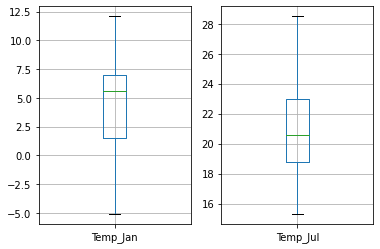

In [71]:
fig = plt.figure()

fig.add_subplot(1,2,1)
df[['Temp_Jan']].boxplot(sym='.')
fig.add_subplot(1,2,2)
df[['Temp_Jul']].boxplot(sym='.')
plt.show()

Not bad these plots. Matplotlib gives a quick insight on data distribution and possible outliers. But the range of the axes are different for the two plots, and unnecessary space is wasted for two y-axes. So the question arises if we could change this.

First, we are going to select the two columns and make a new temporary DataFrame called temp.

In [72]:
temp = df.iloc[:,[1,2]]

Second, we'd like to adapt our columnnames slightly, and the following code does that:

In [73]:
temp.columns = ['January','July']

The following code puts the two boxplots in one figure. We could add a line plt.ylim to adjust the range of the y-axis.

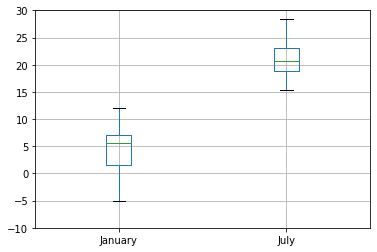

In [74]:
temp.boxplot(sym='.')
plt.ylim(-10, 30)
plt.show()

In the following another boxplot is produced, now for the variable Altitude. Note that some of the parameter settings are changed, such as sym='bo', which means that blue filled dots are used for the outliers; vert=0 means that a horizontal boxplot is used; width adapts the width of the box; patch_artist=True fills the box with a color. Making a boxplot for Altitude shows there are some outliers. In certain contexts outliers can be data errors, because of for example human errors entering data, machine failure etc. The present example of Altitudes shows that not all outliers are data errors.

In [ ]:
fig = plt.figure()
df[['Altitude']].boxplot(sym='bo', widths = 0.4, patch_artist = True, vert=0)
flierprops = dict(markersize=9)
plt.show()


##**16) Barplots**

Using horizontal bars one can get a quick impression of the temperatures and the differences and variation across cities, as well as the differences between winter- (January = dark blue) and summertime (July = light blue). This has been done in the code below. Df.sort_values(by='Temp_Jan', ascending=False) is used to order the bars. In plt.legend() it is possible to change parameters that determine the location of the legend, such as bbox_to_anchor. The parameter mode=expand makes that the legend box takes similar width as the plot8. The data are ordered on January temperature, starting with the city with the lowest temperatures, which is Lulea, situated in the very north of Sweden.

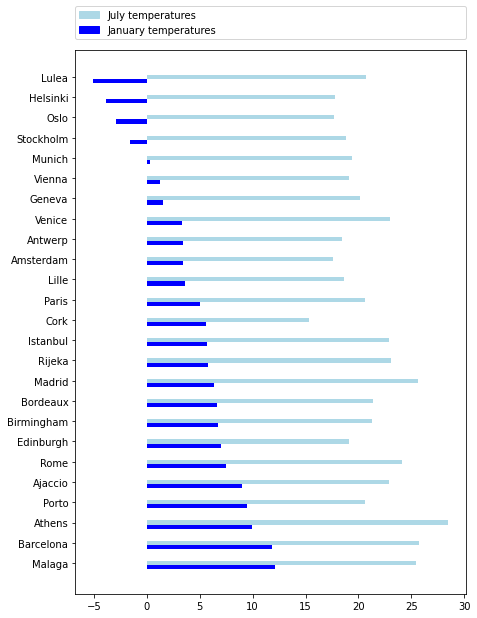

In [76]:
plt.figure(figsize = (7, 10))
barwd = 0.2
r1=range(len(df))
r2=[y+ barwd for y in r1]
plt.barh(r1, df.sort_values(by='Temp_Jan', ascending=False).Temp_Jan, height = barwd, color = 'blue')
plt.barh(r2, df.sort_values(by='Temp_Jan', ascending=False).Temp_Jul, height = barwd, color = 'lightblue')
plt.yticks([s + barwd for s in range(len(df))], df.sort_values(by='Temp_Jan', ascending=False).Place,
  rotation = 0)
lightblue_patch = mpatches.Patch(color='lightblue', label='July temperatures')
blue_patch = mpatches.Patch(color='blue', label='January temperatures')
plt.legend(handles=[lightblue_patch, blue_patch], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

##**17) Pie charts**

To appreciate the different population sizes, we can benefit from a pie chart. As can be directly seen, the pie becomes dense because of the quantity of data, and a smart use of colors is desired. The parameter cs is used for color scaling. The resulting chart shows that Istanbul and Paris are clearly among the largest cities that are in our dataset.

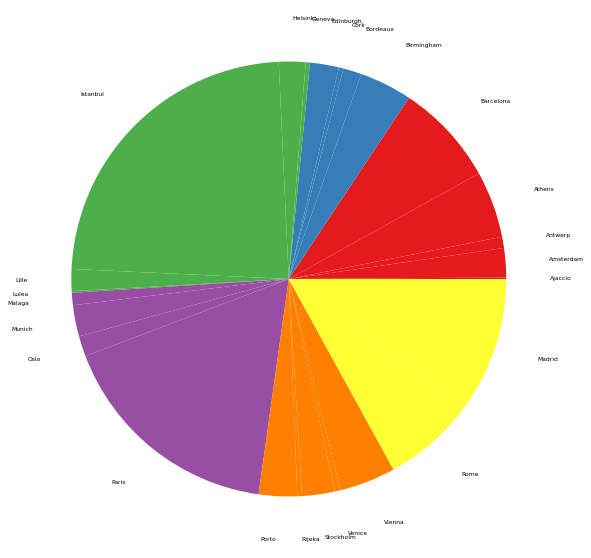

In [77]:
cs = cm.Set1(np.arange(40)/40.)
mpl.rcParams['font.size'] = 6.0
plt.figure(figsize = (10, 10))
x = df.Population
plt.pie(x, labels = df.Place, labeldistance = 1.2, colors = cs)
plt.show()

To deal partly with the density, it it possible to print the labels in a legend outside the pie. Just pass the argument labels=df.Place directly to pyplot.legend(). Use the bbox_to_anchor() argument to place the legend just outside the figure.

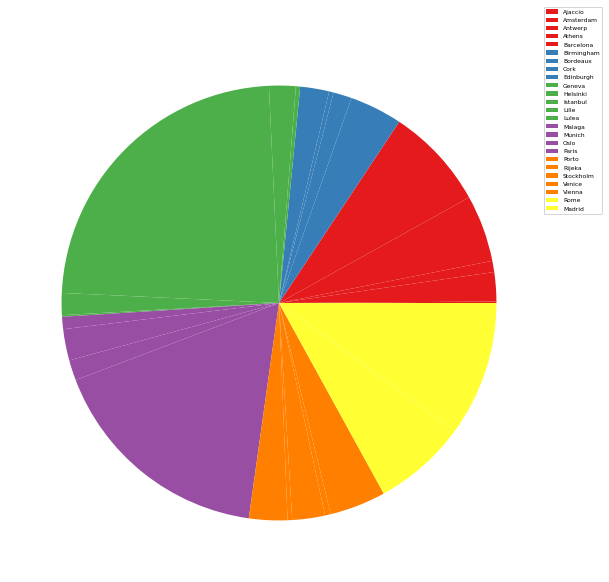

In [78]:
mpl.rcParams['font.size'] = 6.0
plt.figure(figsize = (10, 10))
x = df.Population
plt.pie(x, colors = cs)
plt.legend(labels = df.Place, bbox_to_anchor=(1.1, 1.05))
plt.show()

A different kind of pie chart can be produced using plotly. If you want to try this yourself, you need to first create an account10. You will then need to fill-in your username and API when you run Plotly code:

The pie-chart only needs a few lines of codes and produces a quite interactive chart. Hovering over the pie will show the corresponding label and data.

##**18) Scatterplots**

Scatterplots can be used for exploring relations between data. It shows that there is a roughly linear relation between the winter- and summer temperature. The parameter s can be adapted to change the marker size.

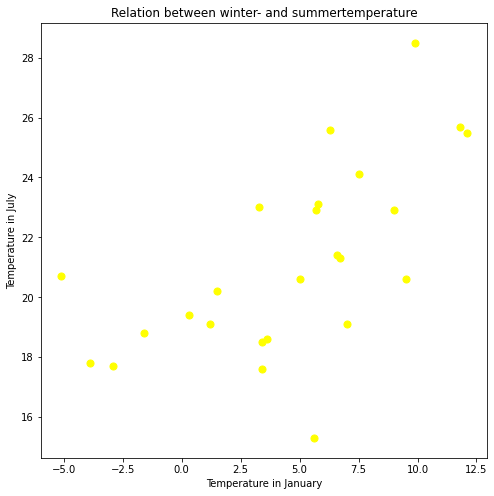

In [81]:
sns.reset_orig()
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Temp_Jul, c = 'yellow', s=50)
plt.title('Relation between winter- and summertemperature')
plt.xlabel('Temperature in January')
plt.ylabel('Temperature in July')
plt.show()

We could display a third variable in this scatterplot. For example, it may be informative to make the dot diameters proportional to the population size. To do this, we could incorporate the variable df.Population into the scatterplot. Using the parameters facecolors and edgecolors, empty circles are used in order to display any overlapping data.

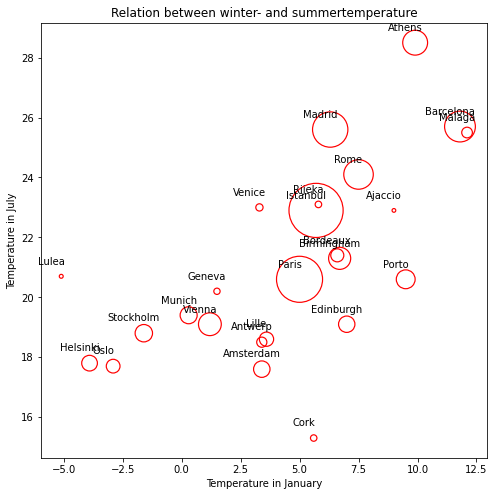

In [82]:
popsize = df.Population/5000

mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Temp_Jul, facecolors='none', edgecolors='red', linewidth=1.2, s=popsize)
plt.title('Relation between winter- and summertemperature')
plt.xlabel('Temperature in January')
plt.ylabel('Temperature in July')

for label, x, y in zip(df.Place, df.Temp_Jan, df.Temp_Jul):
    plt.annotate(
        label,
        xy=(x,y), xytext=(-10,10), textcoords='offset points', ha='center', va='bottom',  
    )
plt.show()

##**19) Replacing values**

One of the most common data transformations is replacing values. The reason can be data entry errors, language differences (e.g., different labels are used for "Geneva", "Genève", "Genf" or "Ginebra"), or different conventions in other contexts. Values can be replaced by the following:

In [83]:
df=df.replace(['Catalan and Spanish'], ['Catalan / Spanish'])

In [84]:
df[df['Language'].str.contains('Cat')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
4,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0


The same is valid for numbers. To replace a value at a certain index use df.iloc. Take care that indexing in Python starts at 0, so that means that the first row/column is at 0, the second row/column at 1, etc. For example, df.iloc[1,2]=17 would replace the value at the second row, third column with the value 17.

##**20) Data categorisation**


Another data transformation concerns making categories from numeric/integer values. Let us do that for example for temperature. The code underneath will categorize data in bins from -10 to -5, -5 to 0 etc. (which means that -5 would be in -10 to -5, -4.9 would be in category -5 to 0). In addition, we create some labels to reflect these categories. Of course, the labels are quite subjective. I met people in Sweden who find -5 Celsius comfortable, while this may be different for people from France.

In [85]:
tempbins = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
templabels = ['Very low', 'Low', 'Reasonaby Low', 'Average', 'Reasonably High', 'High', 'Very High', 'Extremely High']

The following will create the categorized variables:

In [86]:
df['Temp_Jan_cat'] = pd.cut(df['Temp_Jan'], tempbins, labels = templabels)
df['Temp_Jul_cat'] = pd.cut(df['Temp_Jul'], tempbins, labels = templabels)

In [87]:
df.head(5)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042.0,Reasonaby Low,High
3,Athens,9.9,28.5,Greek,338.0,NaT,3090508.0,Average,Extremely High
4,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0,Reasonably High,Extremely High


In [88]:
pd.value_counts(df['Temp_Jan_cat'])

Average            11
Reasonaby Low       8
Low                 3
Reasonably High     2
Very low            1
High                0
Very High           0
Extremely High      0
Name: Temp_Jan_cat, dtype: int64

In [89]:
pd.value_counts(df['Temp_Jul_cat'])

Very High          11
High               10
Extremely High      4
Very low            0
Low                 0
Reasonaby Low       0
Average             0
Reasonably High     0
Name: Temp_Jul_cat, dtype: int64

As we see the pd.cut function created a categorical variable.

In [90]:
df.dtypes

Place                   object
Temp_Jan               float64
Temp_Jul               float64
Language                object
Altitude               float64
MeasureDate     datetime64[ns]
Population             float64
Temp_Jan_cat          category
Temp_Jul_cat          category
dtype: object

The categorized data can be displayed by a histogram. Quite insightful is using overlapping histograms. The setting of alpha = 0.5 means that the bars are transparant in case there is an overlap between categories; however in this case there is no overlap (in other words, all temperatures in July are different from those in January). The bins were set before by tempbins.

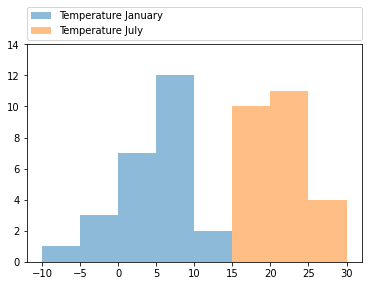

In [91]:
plt.hist(df['Temp_Jan'], alpha= 0.5, bins = tempbins, label='Temperature January')
plt.hist(df['Temp_Jul'], alpha= 0.5, bins = tempbins, label='Temperature July')
plt.ylim(0, 14)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

We may want to compute data as function of the categories. For example, given the temperature categories, is there a different mean precipitation? In Pandas there is a groupby function that can do this. First let us see the categories:

In [92]:
df.groupby(['Temp_Jan_cat']).groups.keys()

dict_keys(['Very low', 'Low', 'Reasonaby Low', 'Average', 'Reasonably High', 'High', 'Very High', 'Extremely High'])

We can then inspect the first entry of every category:

In [93]:
df.groupby(['Temp_Jan_cat']).first()

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jul_cat
Temp_Jan_cat,,,,,,,,
Very low,Lulea,-5.1,20.7,Swedish,6.0,2014-12-31,75966.0,Very High
Low,Helsinki,-3.9,17.8,Finnish,23.0,2016-03-31,1231595.0,High
Reasonaby Low,Amsterdam,3.4,17.6,Dutch,-2.0,2016-01-01,1351587.0,High
Average,Ajaccio,9.0,22.9,French,38.0,2016-12-31,68587.0,Very High
Reasonably High,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0,Extremely High
High,None,NaN,NaN,None,NaN,NaT,NaN,NaN
Very High,None,NaN,NaN,None,NaN,NaT,NaN,NaN
Extremely High,None,NaN,NaN,None,NaN,NaT,NaN,NaN


And now let's compute mean temperature in July as a function of the binned temperature in January:

In [94]:
df.groupby(['Temp_Jan_cat']).Temp_Jul.mean()

Temp_Jan_cat
Very low           20.700000
Low                18.100000
Reasonaby Low      19.625000
Average            22.254545
Reasonably High    25.600000
High                     NaN
Very High                NaN
Extremely High           NaN
Name: Temp_Jul, dtype: float64

If you actually want to view every variable as a function of Temp_Jan_cat:

In [95]:
df.groupby(['Temp_Jan_cat']).mean()

,Temp_Jan,Temp_Jul,Altitude,Population
Temp_Jan_cat,,,,
Very low,-5.100000,20.700000,6.000000,7.596600e+04
Low,-2.800000,18.100000,11.500000,1.229565e+06
Reasonaby Low,2.712500,19.625000,-0.500000,2.249816e+06
Average,7.236364,22.254545,143.333333,3.203461e+06
Reasonably High,11.950000,25.600000,11.500000,2.654565e+06
High,NaN,NaN,NaN,NaN
Very High,NaN,NaN,NaN,NaN
Extremely High,NaN,NaN,NaN,NaN


##**21) Data conversions**

Another data transformation is converting the values using a computation. For example, we may want to create a new variable that reflects the difference between temperatures in January and July.

In [96]:
df.loc[:,"Tempdiff"]= df.loc[:,"Temp_Jan"]-df.loc[:,"Temp_Jul"]

Always make sure to inspect the result:

In [97]:
df[['Place','Temp_Jan', 'Temp_Jul', 'Tempdiff']].head(3)

,Place,Temp_Jan,Temp_Jul,Tempdiff
0,Ajaccio,9.0,22.9,-13.9
1,Amsterdam,3.4,17.6,-14.2
2,Antwerp,3.4,18.5,-15.1


A function can also be used to make a data conversion. For example, if we want to covert temperatures from Celsius into Fahrenheit, we need to make the following conversion12: T(°F) = T(°C) x 9/5 + 32. If you only use this code once, you would probably do the following code, and it will give the new temperatures in Fahrenheit.

In [98]:
(df.Temp_Jan*9/5+32).head(3)

0    48.20
1    38.12
2    38.12
Name: Temp_Jan, dtype: float64

In [99]:
def Tconv(x):
    y=x*9/5+32
    return y

The next step is then to check the function, for example using input temperature 32 °C. Tconv(32) gives an output of 89 °F.

In [100]:
Tconv(32)

89.6

So now it is time to convert a whole column to Fahrenheit:

Basically, the whole column is put in the function, and the output variable is directly written to the DataFrame.

In [101]:
df['Temp_JanF'] = Tconv(df['Temp_Jan'])
df['Temp_JulF'] = Tconv(df['Temp_Jul'])

In [102]:
df.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042.0,Reasonaby Low,High,-15.1,38.12,65.30


##**22) Merging data**

Another operation that is quite frequently used is merge. Note that this is different from append that we applied before, which only concatenated the rows of two dataframes. Now we are going to add a new column Prec_Jan, reflecting precipitation (rainfall).

In [103]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna', 'Stockholm', 'Oslo','Helsinki', 'Lulea', 'Edinburgh', 'Birmingham', 'Cork', 'Antwerp', 'Lille', 'Bordeaux', 'Malaga', 'Porto', 'Venice', 'Ajaccio', 'Rijeka', 'Istanbul', 'Rome'],
        'Prec_Jan': [66.6,43.7,53.7,76.0,48.0,56.9,21.3,39,54.9,52,34,67.5,73.2,131.4,69.3,60.5,87.3,69.0,147.1,47.0,56.7,128.7,105.0,66.9],
        }
df3 = pd.DataFrame(data, columns = ['Place', 'Prec_Jan'])

In [104]:
df3.head(3)

,Place,Prec_Jan
0,Amsterdam,66.6
1,Barcelona,43.7
2,Paris,53.7


We are going to use the Pandas function pd.merge. The columns of the two DataFrames are merged on Place, and the parameter how='left' means that dataset df serves as base (missing values are filled with NaN).

In [105]:
df = pd.merge(df, df3, how='left', on='Place')

In [106]:
df.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22,56.7
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68,66.6
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042.0,Reasonaby Low,High,-15.1,38.12,65.30,69.3


##**23) More scatterplot**

We already explored the relation between temperature in January and July, using the scatterplot function. We are now going to plot the relation between temperature and precipitation in January.

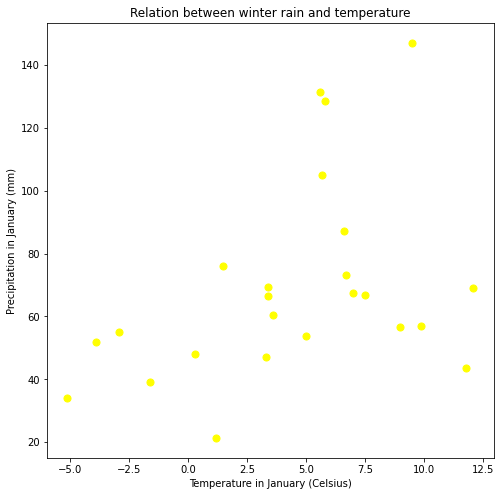

In [107]:
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Prec_Jan, c = 'yellow', s=50)
plt.title('Relation between winter rain and temperature')
plt.xlabel('Temperature in January (Celsius)')
plt.ylabel('Precipitation in January (mm)')
plt.show()

Python offers several packages for data visualization. The following shows a similar scatterplot but now using Seaborn. It automatically adds a regression line to the plot. So what the data suggest is that when average temperatures were higher, the more rainfall there was in January.

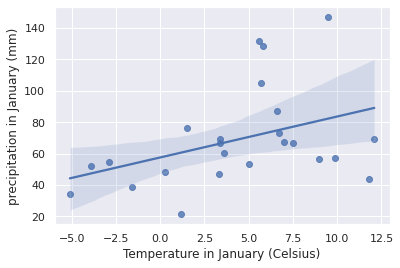

In [108]:
sns.set(color_codes=True)
ax = sns.regplot(x="Temp_Jan", y="Prec_Jan", data=df)
ax.set(xlabel='Temperature in January (Celsius)', ylabel='precipitation in January (mm)')
plt.show()

##**24) Geograaphicaal mapping**

A geographic map can be made for these cities. For this purpose it would be nice to have coordinates, -- the longitude and latitude data --, for the different cities. The longitude is the distance east or west of the prime meridian (i.e., imaginary line from north to south through Greenwich, England). The latitude is the distance north or south of the equator. Both are measured in terms of the 360 degrees of a circle.

In [109]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna', 'Stockholm', 'Oslo', 'Helsinki', 'Lulea', 'Edinburgh', 'Birmingham', 'Cork', 'Antwerp', 'Lille', 'Bordeaux', 'Malaga', 'Porto', 'Venice', 'Ajaccio', 'Rijeka', 'Istanbul', 'Rome', 'Madrid'],
        'Lat': [52.38, 41.38, 48.86, 46.20, 48.15, 37.97, 48.2, 59.32, 59.95, 60.17, 65.58, 55.95, 52.48, 51.90, 51.22, 50.64, 44.84, 36.72, 41.13, 45.44, 41.93, 45.33, 41.01, 41.89, 40.43],
        'Long': [4.9, 2.18, 2.35, 6.14, 11.58, 23.72, 16.37, 18.07, 10.75, 24.94, 22.15, -3.19, -1.89, -8.48, 4.4, 3.06, -0.58, -4.42, -8.67, 12.33, 8.74, 14.44, 28.98, 12.49, -3.68]}

dfr = pd.DataFrame(data, columns = ['Place', 'Lat', 'Long'])

We merge the coordinates data with our available DataFrame.

In [110]:
dfn = pd.merge(df, dfr, how='left', on='Place') # x=long, y=lat

As a next step we inspect some data:

In [111]:
dfn.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22,56.7,41.93,8.74
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68,66.6,52.38,4.90
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042.0,Reasonaby Low,High,-15.1,38.12,65.30,69.3,51.22,4.40


We are then using Basemap for the geographical mapping. We do a straightforward map of the cities, with the diameter of circles reflecting the population size.

First, we need to use longitude and latitude data. It would therefore be good to identify the column Lat and Long automatically. This means, that the script should still work in the event we added or removed some of the columns. How to do that? The central part is using the function np.where, and to search for the variable name.

In [112]:
np.where([dfn.columns=='Long'])

(array([0]), array([14]))

In [113]:
dfn.columns

Index(['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude', 'MeasureDate',
       'Population', 'Temp_Jan_cat', 'Temp_Jul_cat', 'Tempdiff', 'Temp_JanF',
       'Temp_JulF', 'Prec_Jan', 'Lat', 'Long'],
      dtype='object')

The following then writes for each variable name the index of the column.

In [114]:
longitude = np.where([dfn.columns=='Long'])[1].tolist()[0]
latitude = np.where([dfn.columns=='Lat'])[1].tolist()[0]
population = np.where([dfn.columns=='Population'])[1].tolist()[0]

The three parameters, - longitude, latitude, and population -, are used in the geographic plotting of the cities. Other code such as Basemap(), drawmapboundary(), etopo(), drawcoastlines(), drawcountries() are all used to set-up the European map.

AttributeError: ignored

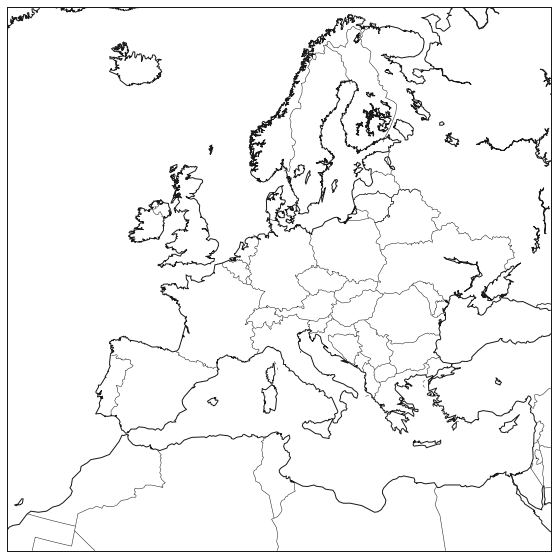

In [116]:
scale = 0.005

plt.figure(figsize=(10,10))
map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50, width = 5000000, height = 5000000, resolution='l') # set res=h
map.drawmapboundary(fill_color='white')
map.etopo()
map.drawcoastlines()
map.drawcountries()

for i in range(0,len(dfn)-1):
        print(dfn.ix[i,longitude], dfn.ix[i,latitude])
        x, y = map(dfn.ix[i,longitude], dfn.ix[i,latitude])
        map.plot(x,y,marker='o', color='Red', markersize=int(math.sqrt(dfn.ix[i,population]))*scale)
plt.show()

##**25) Lineplots**

Temperatures may differ given the longitude and latitude coordinates of the cities, and this is what we may inspect visually. Such a relationship between these coordinates and temperatures could be displayed with lineplots. It should be said in advance that strictly spoken it is not correct to use lineplots in this case, as the measures inbetween the single coordinates are unknown (actually NaNs, so we may not assume it to be linear inbetween). However, for this tutorial we accept this criticism as less important than the exploratory insight that these lineplot offer.

We start with the longitude data. A negative longitude means West of the prime meridian. To get a valid display of data, it needs to be sorted:

In [117]:
dfn = dfn.sort_values(by='Long')

In [118]:
dfn.Long.head(5)

18   -8.67
7    -8.48
14   -4.42
24   -3.68
8    -3.19
Name: Long, dtype: float64

We then use the plot function in Matplotlib. At first sight there seems no special trend, though it should be said that we only have few datapoints available.

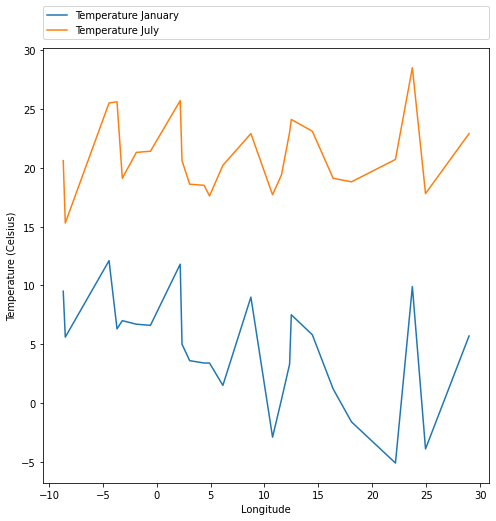

In [119]:
sns.reset_orig()
plt.figure(figsize = (8, 8))
plt.plot(dfn.Long, dfn.Temp_Jan)
plt.plot(dfn.Long, dfn.Temp_Jul)
plt.xlabel('Longitude')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Temperature January','Temperature July'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

We do something similar for the latitude data. So we start sorting the data given the latitude. Note by the way that all values are positive, which is as expected, because all European cities are north of the equator.

In [120]:
dfn = dfn.sort_values(by='Lat')

In [121]:
dfn.Lat.head(5)

14    36.72
3     37.97
24    40.43
11    41.01
18    41.13
Name: Lat, dtype: float64

We again use the plot function. As may be expected, there is a trend that southern cities have higher temperatures in January and July. Again, of course more data would be needed.

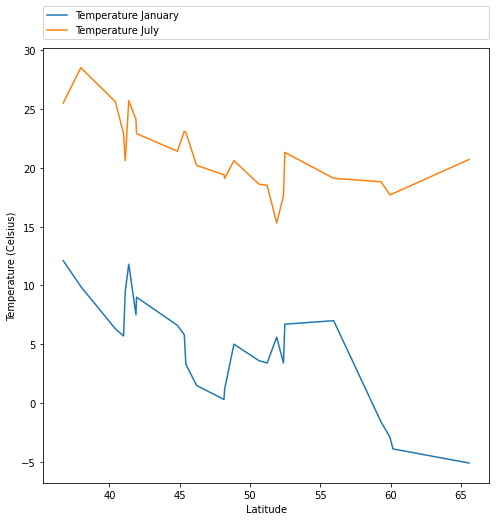

In [122]:
plt.figure(figsize = (8, 8))
plt.plot(dfn.Lat, dfn.Temp_Jan)
plt.plot(dfn.Lat, dfn.Temp_Jul)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Temperature January','Temperature July'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

##**26) Remove rows and columns**

To keep data organized and manageable, sometimes unneeded data need to be removed. So let us practice how to use the del function to delete data.

Remove the column MeasureDate . So let us check again before the removal:

In [123]:
dfn.head(2)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,Malaga,12.1,25.5,Spanish,11.0,NaT,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,Athens,9.9,28.5,Greek,338.0,NaT,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


Here is the del command.

In [124]:
del dfn['MeasureDate']

Now let us see the DataFrame after removal of a column.

In [125]:
dfn.head(2)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,Malaga,12.1,25.5,Spanish,11.0,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,Athens,9.9,28.5,Greek,338.0,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


If you want to remove the first column (index=0) and third column (index=2). To make this definitive, the result needs to be written to the object dfn, such as dfn = dfn.drop(dfn.columns[[0,2]], axis=1).

In [126]:
dfn.drop(dfn.columns[[0,2]], axis=1).head(2)

,Temp_Jan,Language,Altitude,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,12.1,Spanish,11.0,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,9.9,Greek,338.0,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


##**27) Saving the dataframe**

We are going to save the DataFrame to a file with extension .csv. We name the file dfn including date in the filename, to always have a previous backup available. Of course, you can remove the date part if you like.

In [127]:
datestring = datetime.strftime(datetime.now(), '%Y-%m-%d')
datestring
dfn.to_csv('dfn-'+datestring+'.csv', sep=",")

The file can be found back in the following directory:

In [128]:
os.getcwd()

'/content'